Kolom kategorikal yang ditemukan: ['x1', 'x3', 'x4', 'x6', 'x7', 'x9', 'x10', 'x12', 'x14', 'x15', 'x17', 'x19', 'x20']
Hasil Evaluasi Model:
Akurasi: 0.795
Presisi: 0.78125
Recall: 0.423728813559322
F1 Score: 0.5494505494505495
AUC: 0.8272628921745402

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       141
           1       0.78      0.42      0.55        59

    accuracy                           0.80       200
   macro avg       0.79      0.69      0.71       200
weighted avg       0.79      0.80      0.77       200



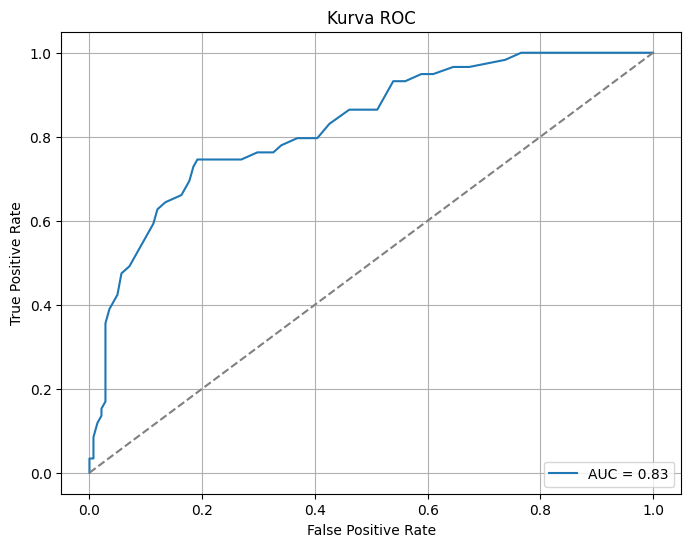

In [2]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Membaca dataset
file_path = 'CreditDataset.csv'
data = pd.read_csv(file_path)

# Kolom target
kolom_target = 'Class'

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=[kolom_target])
y = data[kolom_target]

# Mengonversi nilai target menjadi {0, 1}
y = y.map({1: 0, 2: 1})

# Mengidentifikasi kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
print("Kolom kategorikal yang ditemukan:", categorical_columns.tolist())

# Mengonversi kolom kategorikal menjadi numerik menggunakan One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_columns)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif

# Menghitung metrik evaluasi
akurasi = accuracy_score(y_test, y_pred)
presisi = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
print("Akurasi:", akurasi)
print("Presisi:", presisi)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Plot kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
